### **Examen de certificación – Intento 1**
Descripción
Examen de cinturón AML – Opción C

**Descripción del examen:**
En este examen, trabajarás con un dataset de mayor complejidad, aplicando un análisis no supervisado utilizando K-means o PCA para identificar patrones ocultos y luego utilizando un modelo Perceptrón Multicapa (MLP) para realizar predicciones. El examen se centrará en extraer características clave de los datos y aplicar técnicas avanzadas de modelado para realizar predicciones precisas.

Dataset:
El dataset utilizado es el «Human Activity Recognition with Smartphones Dataset», que contiene datos recogidos de acelerómetros en smartphones mientras los usuarios realizan actividades cotidianas. El objetivo es clasificar el tipo de actividad física basándose en datos sensoriales de múltiples ejes.
Enlace al dataset: https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

**Instrucciones:**

**1. Exploración y preprocesamiento de datos:**

  – Carga y explora el dataset, identificando las variables relacionadas con los datos sensoriales. Este conjunto de datos incluye lecturas de aceleración en los ejes X, Y y Z mientras los sujetos realizan actividades como caminar, correr, y subir escaleras.
  – Asegúrate de manejar cualquier valor nulo, normalizando las lecturas sensoriales para mejorar el rendimiento del análisis y el modelado posterior.

**2. Análisis no supervisado:**

  – Selecciona un enfoque de análisis no supervisado: K-means o PCA.
    – K-means: Utiliza K-means para agrupar las actividades de los usuarios en clusters y analiza si los grupos corresponden a los tipos de actividad física.
    – PCA: Si eliges PCA, realiza una reducción de dimensionalidad para identificar los componentes principales que explican la mayor variabilidad en los datos sensoriales. Visualiza los datos en el espacio reducido de los componentes principales.

**3. Modelado con MLP:**

  – Desarrolla un modelo MLP para predecir el tipo de actividad física realizada por los usuarios basándose en los datos sensoriales.
  – Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de que las distintas actividades estén bien representadas en ambos conjuntos.
  – Configura la arquitectura del MLP, utilizando al menos dos capas ocultas, y ajusta hiperparámetros como el tamaño del batch, el número de épocas y la tasa de aprendizaje.

**4. Evaluación del modelo:**

  – Evalúa el rendimiento del MLP utilizando métricas como la precisión, el recall, el F1-score y la matriz de confusión. Discute si el modelo es capaz de predecir correctamente las distintas actividades físicas.
  – Visualiza las curvas de aprendizaje, mostrando cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento.

**5. Discusión y análisis:**

  – Reflexiona sobre los resultados del análisis no supervisado. ¿El análisis de clusters o PCA proporcionó insights útiles sobre las actividades? ¿Qué características son más importantes para clasificar las actividades físicas?
  – Discute el rendimiento del MLP y cómo podría mejorarse. ¿Es adecuado este enfoque para predecir actividades basadas en datos sensoriales?

**6. Entrega final:**

  – Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación y conclusiones. Apoya tu informe con visualizaciones que demuestren los resultados obtenidos.

In [3]:
from sklearn.metrics import roc_auc_score
from tensorflow.keras.layers import Dropout
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.callbacks import EarlyStopping

## 1. Exploración y preprocesamiento de datos:


In [4]:
import pandas as pd

# Cargar el dataset train

#df = pd.read_csv('C:/Users/edamv/Advanced_Machine_Learning_Exams/AML_Intento1_14122024/Human Activity Recognition with Smartphones/train.csv') SI LEE DIRECTAMENTE EL ARCHIVO EN VSC
df_train = pd.read_csv('train.csv') #COLAB


# Características del dataset
print("--- Información del Dataset ---")
print(f"Forma del dataset: {df_train.shape}")
print("\n--- Mostrar las primeras filas del dataset ---")
print(df_train.head())
print("\n--- Verificar las columnas del dataset ---")
print(df_train.columns)
print("\n--- Tipos de Datos ---")
print(df_train.dtypes)

# Identificar valores faltantes
print("\n--- Valores faltantes por columna ---")
print(df_train.isnull().sum())

# Identificar filas duplicadas
duplicate_rows = df_train.duplicated().sum()
print(f"\n--- Filas duplicadas ---\n{duplicate_rows} filas duplicadas encontradas.")


--- Información del Dataset ---
Forma del dataset: (7352, 563)

--- Mostrar las primeras filas del dataset ---
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817    

In [5]:
import pandas as pd

# Cargar el dataset test

#df = pd.read_csv('C:/Users/edamv/Advanced_Machine_Learning_Exams/AML_Intento1_14122024/Human Activity Recognition with Smartphones/test.csv') SI LEE DIRECTAMENTE EL ARCHIVO EN VSC
df_test = pd.read_csv('test.csv') #COLAB


# Características del dataset
print("--- Información del Dataset ---")
print(f"Forma del dataset: {df_test.shape}")
print("\n--- Mostrar las primeras filas del dataset ---")
print(df_test.head())
print("\n--- Verificar las columnas del dataset ---")
print(df_test.columns)
print("\n--- Tipos de Datos ---")
print(df_test.dtypes)

# Identificar valores faltantes
print("\n--- Valores faltantes por columna ---")
print(df_test.isnull().sum())

# Identificar filas duplicadas
duplicate_rows = df_test.duplicated().sum()
print(f"\n--- Filas duplicadas ---\n{duplicate_rows} filas duplicadas encontradas.")


--- Información del Dataset ---
Forma del dataset: (2947, 563)

--- Mostrar las primeras filas del dataset ---
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445    

**Observaciones preliminares**

- El conjunto de datos contiene 563 columnas, incluidas dos variables objetivo: una numérica ['subject'] y otra categórica ['Activity'].
- Todas las características son numéricas, enteros o flotantes, lo que elimina la necesidad de convertir los tipos de datos.
- No se encontraron valores nulos en los datasets de train ni test.
- No se encontraron filas duplicadas en los datasets.
- El análisis preliminar no reveló ningún valor atípico significativo en el conjunto de datos.

EDA

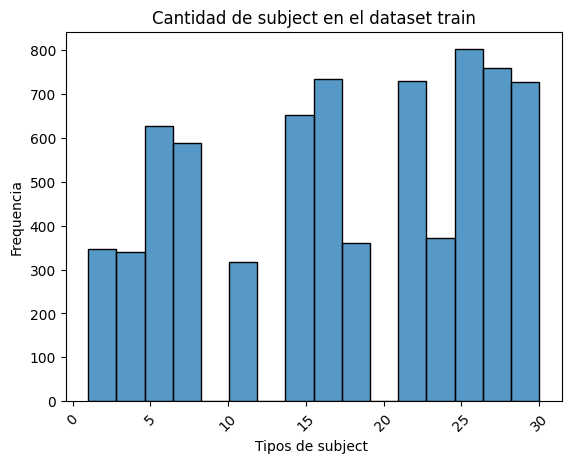

In [6]:
# Revisar columna subject

sns.histplot(df_train['subject'])
plt.xlabel("Tipos de subject ")
plt.ylabel("Frequencia")
plt.xticks(rotation=45)
plt.title("Cantidad de subject en el dataset train")
plt.show()

#Observaciones:
#Hay 10 tipos de subjects diferentes en el conjunto de datos, numerados del 0 al 30.
#El tipo de subject con mayor cantidad es el tipo 25, con aproximadamente 750 subjects.
#Después del tipo 25, los tipos de subjects con más frecuencia son el 20 y el 15, con alrededor de 700 y 650 subjects respectivamente.
#Los tipos de subjects con menor cantidad son el 0, 5 y 10, con menos de 400 subjects cada uno.

<ipython-input-7-60649f0459d5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=df_train, x='Activity', palette='Set2')


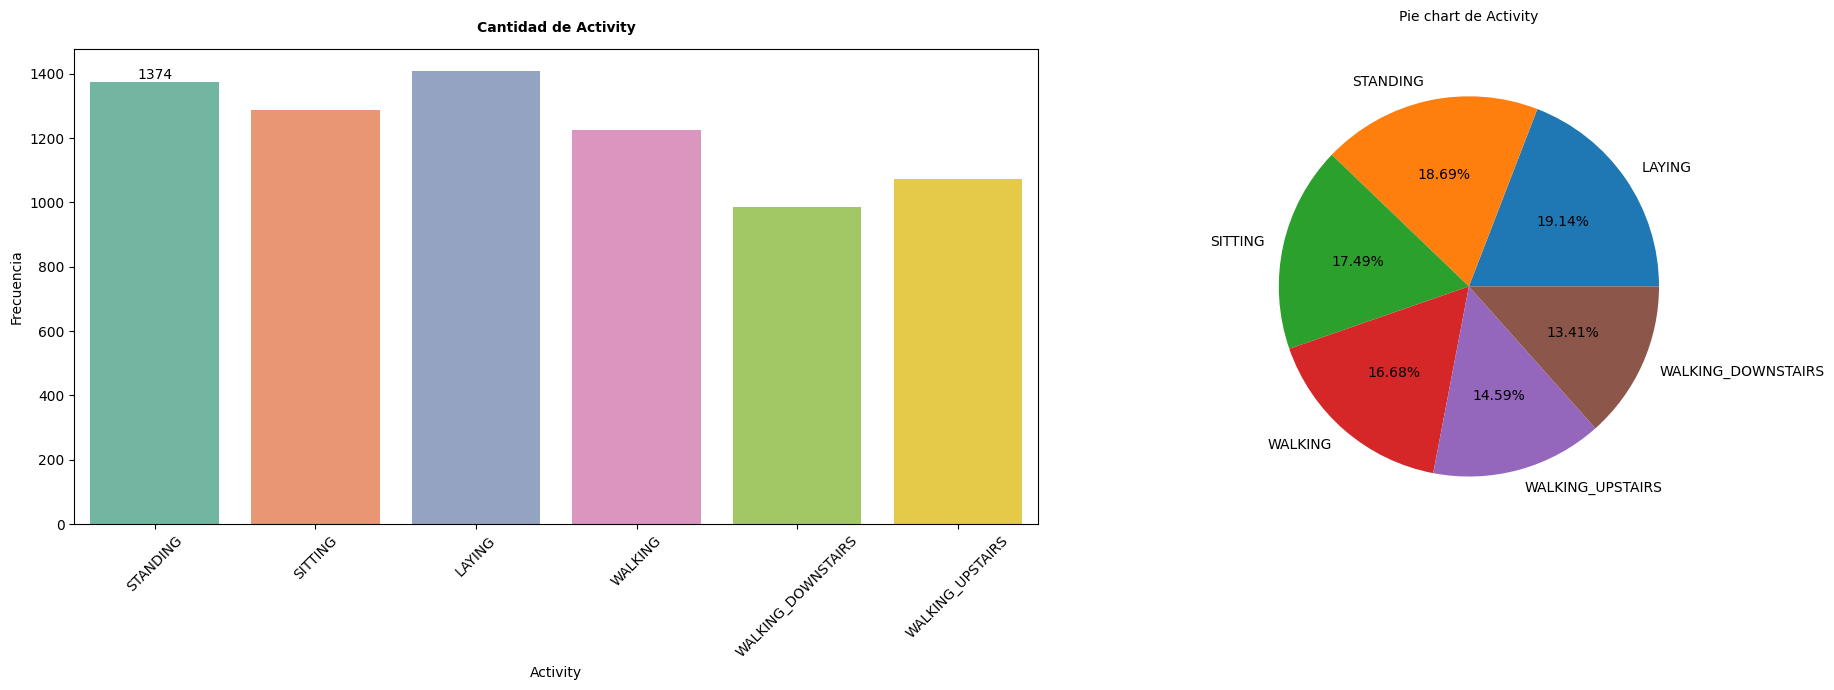

In [7]:
# Revisar columna Activity

plt.figure(figsize = (20, 7))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=df_train, x='Activity', palette='Set2')
plt.title("Cantidad de Activity", pad=12, fontsize=10, fontweight='bold')
plt.xlabel('Activity')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
ax1.bar_label(ax1.containers[0])

plt.subplot(1, 2, 2)
acivity_count_labels = df_train['Activity'].value_counts()
plt.pie(acivity_count_labels,
        autopct="%.2f%%",
        labels = acivity_count_labels.index
)
plt.title("Pie chart de Activity", pad=20, fontsize=10, fontweight=20)

plt.tight_layout()
plt.show()


#Observaciones:
#Gráfico de barras - "Cantidad de Activity":
#Este gráfico muestra la frecuencia (cantidad) de cada tipo de actividad registrada en el conjunto de datos. Podemos observar que la actividad más común es "STANDING" con 1374 instancias.
#Otras actividades comunes son "SITTING" con 768 instancias y "LAYING" con 488 instancias.
#Las actividades menos frecuentes son "WALKING UPSTAIRS" con 94 instancias y "WALKING DOWNSTAIRS" con 190 instancias.
#Gráfico de pastel - "Pie chart de Activity":
#Este gráfico circular muestra la distribución porcentual de los diferentes tipos de actividad. Podemos ver que la actividad más común es "STANDING" con un 18.69% del total.
#Le siguen "SITTING" con 17.49%, "LAYING" con 19.14% y "WALKING" con 13.41%. Las actividades menos comunes son "WALKING UPSTAIRS" con 6.68% y "WALKING DOWNSTAIRS" con 14.59%.

#En resumen, este conjunto de datos se enfoca en actividades comunes realizadas por los usuarios, como estar de pie, sentado y acostado.
#Las actividades de caminar, subir y bajar escaleras tienen una representación más baja en comparación.

## 2. Análisis no supervisado:


- Variación explicada acumulada
- Ganancia de varianza explicada
- Gráfico de dispersión preliminar para visualizar los datos


## Variación explicada acumulada

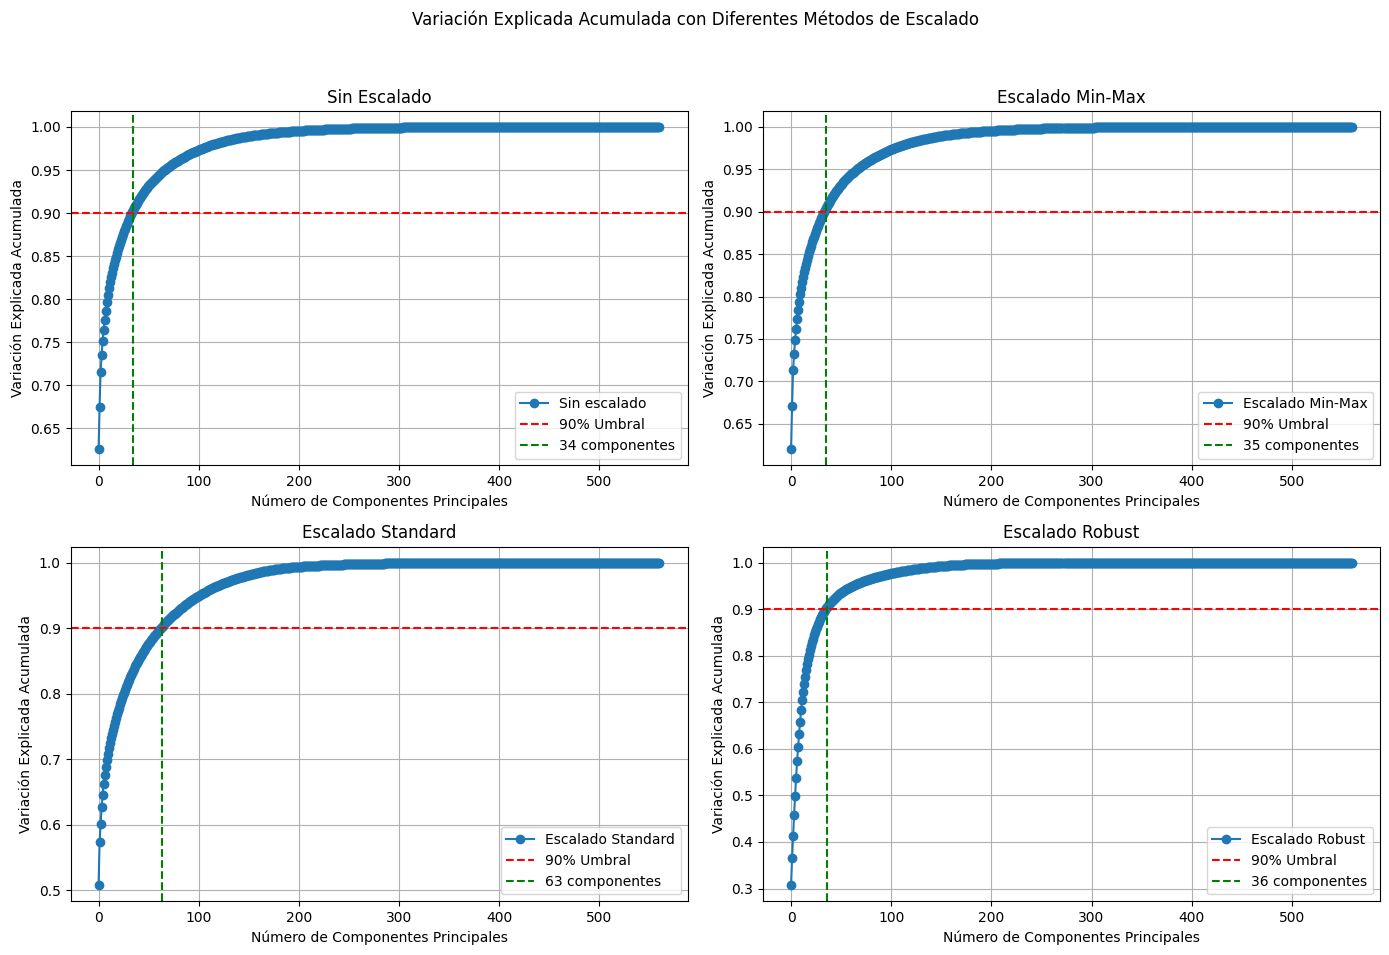

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Separar las características y la variable objetivo
X = df_train.drop(columns=['Activity', 'subject'])
y = df_train['Activity']

# Definir el umbral del 90%
threshold = 0.9

# Sin escalado
pca_no_scaling = PCA()
X_no_scaling_pca = pca_no_scaling.fit_transform(X)
var_exp_no_scaling = pca_no_scaling.explained_variance_ratio_.cumsum()
optimal_components_no_scaling = np.argmax(var_exp_no_scaling >= threshold) + 1

# Escalado Min-Max
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)
pca_minmax = PCA()
X_minmax_pca = pca_minmax.fit_transform(X_minmax_scaled)
var_exp_minmax = pca_minmax.explained_variance_ratio_.cumsum()
optimal_components_minmax = np.argmax(var_exp_minmax >= threshold) + 1

# Escalado Standard
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)
pca_standard = PCA()
X_standard_pca = pca_standard.fit_transform(X_standard_scaled)
var_exp_standard = pca_standard.explained_variance_ratio_.cumsum()
optimal_components_standard = np.argmax(var_exp_standard >= threshold) + 1

# Escalado Robust
robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X)
pca_robust = PCA()
X_robust_pca = pca_robust.fit_transform(X_robust_scaled)
var_exp_robust = pca_robust.explained_variance_ratio_.cumsum()
optimal_components_robust = np.argmax(var_exp_robust >= threshold) + 1

# Crear figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Sin escalado
axs[0, 0].plot(var_exp_no_scaling, label='Sin escalado', linestyle='-', marker='o')
axs[0, 0].axhline(y=threshold, color='r', linestyle='--', label='90% Umbral')
axs[0, 0].axvline(x=optimal_components_no_scaling, color='g', linestyle='--', label=f'{optimal_components_no_scaling} componentes')
axs[0, 0].set_title('Sin Escalado')
axs[0, 0].set_xlabel('Número de Componentes Principales')
axs[0, 0].set_ylabel('Variación Explicada Acumulada')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Escalado Min-Max
axs[0, 1].plot(var_exp_minmax, label='Escalado Min-Max', linestyle='-', marker='o')
axs[0, 1].axhline(y=threshold, color='r', linestyle='--', label='90% Umbral')
axs[0, 1].axvline(x=optimal_components_minmax, color='g', linestyle='--', label=f'{optimal_components_minmax} componentes')
axs[0, 1].set_title('Escalado Min-Max')
axs[0, 1].set_xlabel('Número de Componentes Principales')
axs[0, 1].set_ylabel('Variación Explicada Acumulada')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Escalado Standard
axs[1, 0].plot(var_exp_standard, label='Escalado Standard', linestyle='-', marker='o')
axs[1, 0].axhline(y=threshold, color='r', linestyle='--', label='90% Umbral')
axs[1, 0].axvline(x=optimal_components_standard, color='g', linestyle='--', label=f'{optimal_components_standard} componentes')
axs[1, 0].set_title('Escalado Standard')
axs[1, 0].set_xlabel('Número de Componentes Principales')
axs[1, 0].set_ylabel('Variación Explicada Acumulada')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Escalado Robust
axs[1, 1].plot(var_exp_robust, label='Escalado Robust', linestyle='-', marker='o')
axs[1, 1].axhline(y=threshold, color='r', linestyle='--', label='90% Umbral')
axs[1, 1].axvline(x=optimal_components_robust, color='g', linestyle='--', label=f'{optimal_components_robust} componentes')
axs[1, 1].set_title('Escalado Robust')
axs[1, 1].set_xlabel('Número de Componentes Principales')
axs[1, 1].set_ylabel('Variación Explicada Acumulada')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.suptitle('Variación Explicada Acumulada con Diferentes Métodos de Escalado')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Observaciones del paso anterior: Selección de parámetros

**Umbral 90%:**  
Para realizar el paso anterior, se seleccionó un umbral del 90% debido a que permite capturar la mayor parte de la variabilidad en los datos con un número razonable de componentes. Esto ayuda a reducir la dimensionalidad del dataset, manteniendo la mayoría de la información relevante, lo que facilita el análisis y modelado posterior. El 90% es un buen compromiso entre la simplicidad del modelo (menos componentes) y la cantidad de información retenida.




## Observaciones del paso anterior: Comparación de métodos de escalado:

Decidí utilizar diferentes métodos de escalado debido a que cada uno ofrece una perspectiva diferente y poder visualizar cuál sería el más adecuado para optimizar el análisis y lograr la reducción de dimensionalidad eficiente.

**Sin Escalado:**

Con el umbral del 90%, se requieren 34 componentes principales.
Esta opción mantiene un buen balance entre la varianza explicada y la complejidad del modelo.


**Escalado Min-Max:**

Con resultado similar al método sin escalamiento, se necesitan 35 componentes principales para alcanzar el 90% de varianza explicada.
Es muy similar al método sin escalamiento, por lo que también representa una opción equilibrada.


**Escalado Standard:**

Este método requiere muchos más componentes principales (63) para alcanzar el mismo umbral del 90%. Esto sugiere que la estandarización (media 0 y desviación estándar 1) ha afectado la variación de las características, posiblemente debido a las grandes diferencias en sus magnitudes originales.


**Escalado Robust:**

Requiere 36 componentes principales, similar a los resultados sin escalado y con Min-Max. Esto indica que, al igual que Min-Max, la escalabilidad robusta (basada en la mediana y el rango intercuartil) maneja bien los valores atípicos sin cambiar drásticamente la variación de las características.



## Elección de escalado:

Se seleccionarán el método sin escalar y el escalado Min-Max debido a las siguientes ventajas con respecto a los otros métodos de escalado:

**Ventajas Sin Escalar**

**Retención de Varianza Alta:** Sugiere que los componentes principales identificados son capaces de explicar una gran parte de la varianza original en los datos. Alcanzando 34 componentes con un 90% del umbral.

**Datos Originales:** Al no escalar los datos, se mantienen las características originales tal como están. En este dataset, los valores ya se encuentran en una escala de 0 a 1.

**Menos Transformaciones:** Evita posibles errores o distorsiones que pueden surgir durante el proceso de escalado.

**Ventajas Min-Max**

**Eficiencia en la Reducción de Dimensionalidad:**

El escalado Min-Max mantiene los datos en el rango [0, 1], lo que facilita la uniformidad en las características.

En nuestro análisis, el Min-Max requería 35 componentes para alcanzar el 90% de variación explicada, lo cual es similar a sin escalado pero con una mejor normalización de las características.

**Manejo de Valores Atípicos:**

Este dataset podría contener algunos outliers los cuales no se pueden visualizar del todo debido a la inmensidad del mismo. Sin embargo, el Min-Max es menos sensible a los valores atípicos en comparación con el Escalado Standard.

**Compatibilidad con Modelos de Machine Learning:**

Si bien, en este dataset existen valores negativos, entonces, se modificará el rango a [-1,1] para una mejor captura de la variabilidad y distribución original. Aún así, se utilizará también



## Ganancia de varianza explicada

In [10]:
# Definir el umbral de ganancia significativa
threshold_gain = 0.01

# Función para calcular las 10 principales ganancias de varianza explicada ordenadas de mayor a menor
def calcular_ganancias_principales_ordenadas(pca, n_componentes=10):
    explained_variance_cumulative = np.cumsum(pca.explained_variance_ratio_)
    explained_variance_gain = np.diff(explained_variance_cumulative, prepend=0)
    indices_principales = np.argsort(explained_variance_gain)[-n_componentes:]
    indices_principales_ordenados = indices_principales[np.argsort(explained_variance_gain[indices_principales])[::-1]]
    return indices_principales_ordenados + 1, explained_variance_gain[indices_principales_ordenados]

# Sin escalado
pca_no_scaling = PCA()
X_no_scaling_pca = pca_no_scaling.fit_transform(X)
indices_principales_no_scaling, explained_variance_gain_no_scaling = calcular_ganancias_principales_ordenadas(pca_no_scaling)
print("Ganancia de varianza explicada por componente (Sin Escalado):")
for i, gain in zip(indices_principales_no_scaling, explained_variance_gain_no_scaling):
    print(f"Componente {i}: {gain:.2%}")

# Escalado Min-Max
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)
pca_minmax = PCA()
X_minmax_pca = pca_minmax.fit_transform(X_minmax_scaled)
indices_principales_minmax, explained_variance_gain_minmax = calcular_ganancias_principales_ordenadas(pca_minmax)
print("Ganancia de varianza explicada por componente (Escalado Min-Max):")
for i, gain in zip(indices_principales_minmax, explained_variance_gain_minmax):
    print(f"Componente {i}: {gain:.2%}")

# Escalado Standard
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)
pca_standard = PCA()
X_standard_pca = pca_standard.fit_transform(X_standard_scaled)
indices_principales_standard, explained_variance_gain_standard = calcular_ganancias_principales_ordenadas(pca_standard)
print("Ganancia de varianza explicada por componente (Escalado Standard):")
for i, gain in zip(indices_principales_standard, explained_variance_gain_standard):
    print(f"Componente {i}: {gain:.2%}")

# Escalado Robust
robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X)
pca_robust = PCA()
X_robust_pca = pca_robust.fit_transform(X_robust_scaled)
indices_principales_robust, explained_variance_gain_robust = calcular_ganancias_principales_ordenadas(pca_robust)
print("Ganancia de varianza explicada por componente (Escalado Robust):")
for i, gain in zip(indices_principales_robust, explained_variance_gain_robust):
    print(f"Componente {i}: {gain:.2%}")


Ganancia de varianza explicada por componente (Sin Escalado):
Componente 1: 62.55%
Componente 2: 4.91%
Componente 3: 4.12%
Componente 4: 1.87%
Componente 5: 1.69%
Componente 6: 1.27%
Componente 7: 1.18%
Componente 8: 1.07%
Componente 9: 0.97%
Componente 10: 0.86%
Ganancia de varianza explicada por componente (Escalado Min-Max):
Componente 1: 61.99%
Componente 2: 5.10%
Componente 3: 4.29%
Componente 4: 1.87%
Componente 5: 1.67%
Componente 6: 1.25%
Componente 7: 1.18%
Componente 8: 1.08%
Componente 9: 0.98%
Componente 10: 0.85%
Ganancia de varianza explicada por componente (Escalado Standard):
Componente 1: 50.78%
Componente 2: 6.58%
Componente 3: 2.81%
Componente 4: 2.50%
Componente 5: 1.89%
Componente 6: 1.72%
Componente 7: 1.37%
Componente 8: 1.20%
Componente 9: 1.00%
Componente 10: 0.97%
Ganancia de varianza explicada por componente (Escalado Robust):
Componente 1: 30.74%
Componente 2: 5.73%
Componente 3: 4.72%
Componente 4: 4.62%
Componente 5: 4.16%
Componente 6: 3.87%
Componente 7:

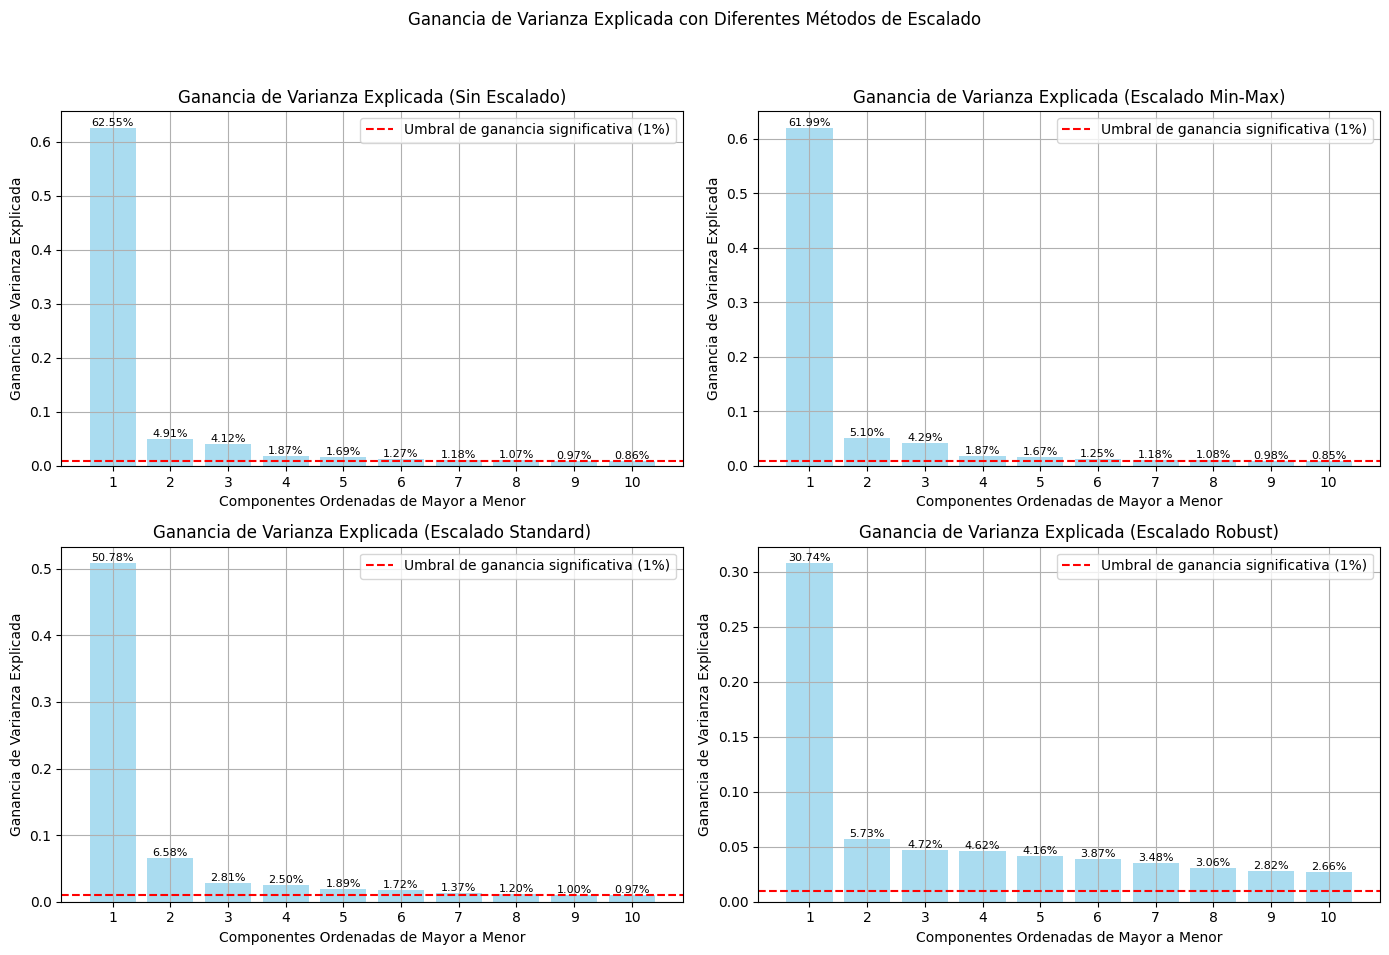

In [11]:
# Crear figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Sin escalado
axs[0, 0].bar(range(1, len(indices_principales_no_scaling) + 1), explained_variance_gain_no_scaling, color='skyblue', alpha=0.7)
axs[0, 0].axhline(y=threshold_gain, color='r', linestyle='--', label='Umbral de ganancia significativa (1%)')
axs[0, 0].set_title('Ganancia de Varianza Explicada (Sin Escalado)')
axs[0, 0].set_xlabel('Componentes Ordenadas de Mayor a Menor')
axs[0, 0].set_ylabel('Ganancia de Varianza Explicada')
axs[0, 0].legend()
axs[0, 0].grid(True)
axs[0, 0].set_xticks(range(1, len(indices_principales_no_scaling) + 1))  # Mostrar solo las componentes seleccionadas
for i, (component, gain) in enumerate(zip(indices_principales_no_scaling, explained_variance_gain_no_scaling), 1):
    axs[0, 0].text(i, gain, f"{gain:.2%}", ha='center', va='bottom', fontsize=8, color='black')

# Escalado Min-Max
axs[0, 1].bar(range(1, len(indices_principales_minmax) + 1), explained_variance_gain_minmax, color='skyblue', alpha=0.7)
axs[0, 1].axhline(y=threshold_gain, color='r', linestyle='--', label='Umbral de ganancia significativa (1%)')
axs[0, 1].set_title('Ganancia de Varianza Explicada (Escalado Min-Max)')
axs[0, 1].set_xlabel('Componentes Ordenadas de Mayor a Menor')
axs[0, 1].set_ylabel('Ganancia de Varianza Explicada')
axs[0, 1].legend()
axs[0, 1].grid(True)
axs[0, 1].set_xticks(range(1, len(indices_principales_minmax) + 1))  # Mostrar solo las componentes seleccionadas
for i, (component, gain) in enumerate(zip(indices_principales_minmax, explained_variance_gain_minmax), 1):
    axs[0, 1].text(i, gain, f"{gain:.2%}", ha='center', va='bottom', fontsize=8, color='black')

# Escalado Standard
axs[1, 0].bar(range(1, len(indices_principales_standard) + 1), explained_variance_gain_standard, color='skyblue', alpha=0.7)
axs[1, 0].axhline(y=threshold_gain, color='r', linestyle='--', label='Umbral de ganancia significativa (1%)')
axs[1, 0].set_title('Ganancia de Varianza Explicada (Escalado Standard)')
axs[1, 0].set_xlabel('Componentes Ordenadas de Mayor a Menor')
axs[1, 0].set_ylabel('Ganancia de Varianza Explicada')
axs[1, 0].legend()
axs[1, 0].grid(True)
axs[1, 0].set_xticks(range(1, len(indices_principales_standard) + 1))  # Mostrar solo las componentes seleccionadas
for i, (component, gain) in enumerate(zip(indices_principales_standard, explained_variance_gain_standard), 1):
    axs[1, 0].text(i, gain, f"{gain:.2%}", ha='center', va='bottom', fontsize=8, color='black')

# Escalado Robust
axs[1, 1].bar(range(1, len(indices_principales_robust) + 1), explained_variance_gain_robust, color='skyblue', alpha=0.7)
axs[1, 1].axhline(y=threshold_gain, color='r', linestyle='--', label='Umbral de ganancia significativa (1%)')
axs[1, 1].set_title('Ganancia de Varianza Explicada (Escalado Robust)')
axs[1, 1].set_xlabel('Componentes Ordenadas de Mayor a Menor')
axs[1, 1].set_ylabel('Ganancia de Varianza Explicada')
axs[1, 1].legend()
axs[1, 1].grid(True)
axs[1, 1].set_xticks(range(1, len(indices_principales_robust) + 1))  # Mostrar solo las componentes seleccionadas
for i, (component, gain) in enumerate(zip(indices_principales_robust, explained_variance_gain_robust), 1):
    axs[1, 1].text(i, gain, f"{gain:.2%}", ha='center', va='bottom', fontsize=8, color='black')

plt.suptitle('Ganancia de Varianza Explicada con Diferentes Métodos de Escalado')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Interpretación y Selección de Método de Escalado

Primeramente, se seleccionaron un top 10 de ganancias para cada tipo de escalamiento. A continuación, se describen los hallazgos:



**Sin Escalado y Min-Max:** Capturaron una mayor proporción de la variabilidad total. Esto sugiere que si las características de tus datos no tienen diferencias drásticas en magnitudes o si los valores atípicos no son una preocupación significativa, estos métodos pueden ser adecuados.

**Escalado Standard:** Uniformiza las características y es útil cuando las diferencias en magnitudes y unidades son importantes. Aunque la ganancia de varianza es menor, proporciona una representación más uniforme de los datos.

**Escalado Robust:** Captura la menor variabilidad pero es ideal para manejar datos con muchos valores atípicos. Aunque reduce la varianza capturada, evita que los outliers dominen el análisis.


Por lo tanto, se reitera la elección del proceso anterior, seleccionando los métodos sin escalar y escalado min-max.

## Gráfico de Dispersión

In [12]:
# Aplicar PCA sin escalar
pca_no_scaling = PCA(n_components=2)  # Usar 2 componentes principales para el gráfico de dispersión
X_pca_no_scaling = pca_no_scaling.fit_transform(X)

# Aplicar PCA con Escalado Min-Max
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)
pca_minmax = PCA(n_components=2)
X_pca_minmax = pca_minmax.fit_transform(X_minmax_scaled)

# Aplicar PCA con Escalado Standard
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)
pca_standard = PCA(n_components=2)
X_pca_standard = pca_standard.fit_transform(X_standard_scaled)

# Aplicar PCA con Escalado Robust
robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X)
pca_robust = PCA(n_components=2)
X_pca_robust = pca_robust.fit_transform(X_robust_scaled)


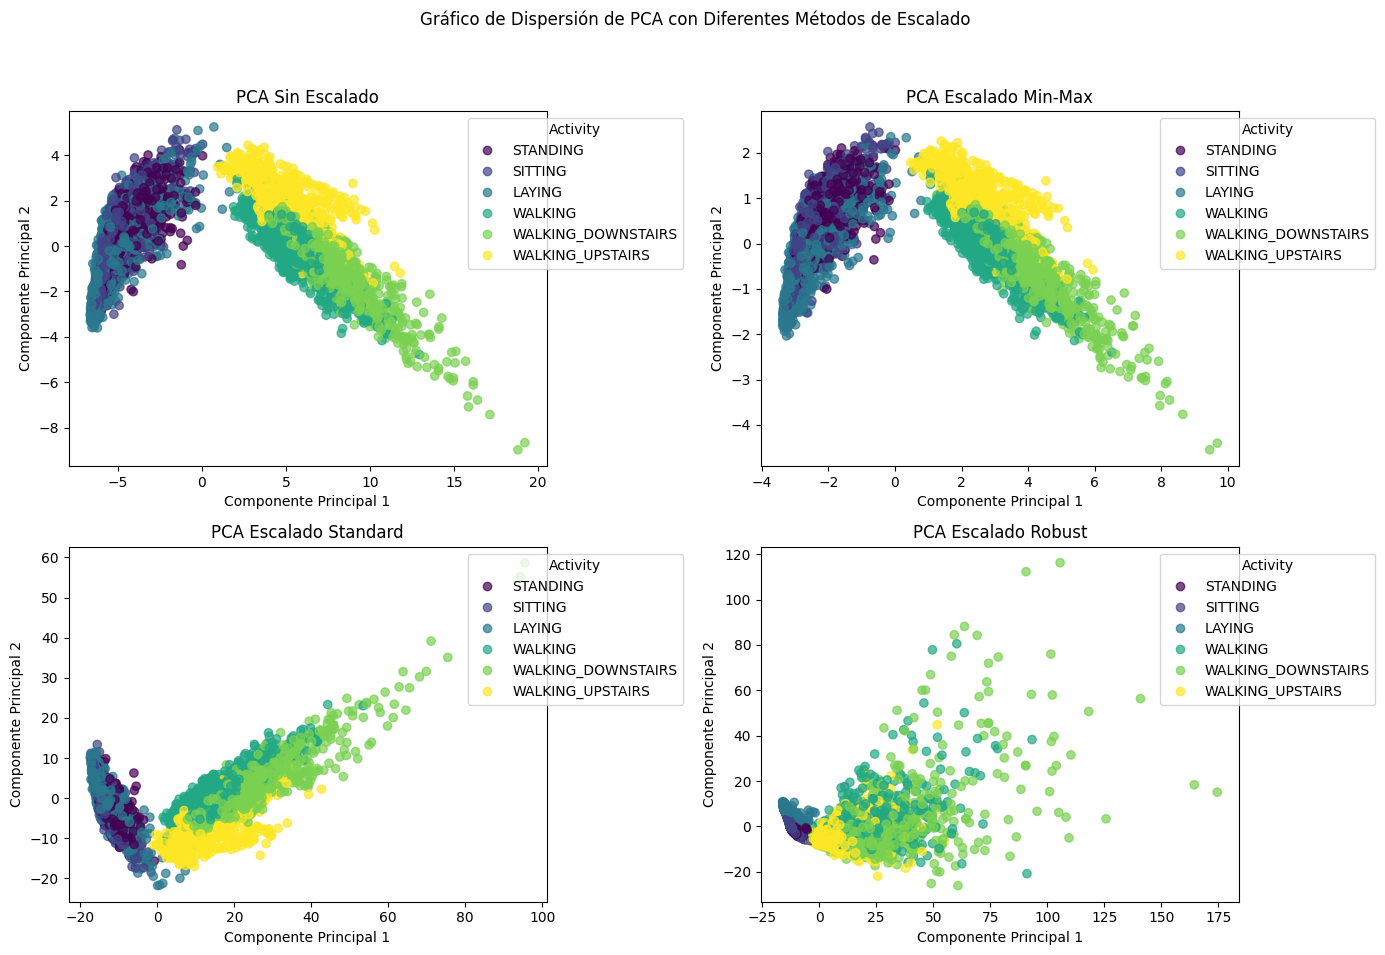

In [13]:

# Mapear la variable objetivo a valores numéricos
y_unique = y.unique()
y_map = {label: idx for idx, label in enumerate(y_unique)}
y_numeric = y.map(y_map)

# Crear figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Definir colormap
colormap = sns.color_palette("viridis", as_cmap=True)

# Sin escalado
scatter = axs[0, 0].scatter(X_pca_no_scaling[:, 0], X_pca_no_scaling[:, 1], c=y_numeric, cmap=colormap, alpha=0.7)
axs[0, 0].set_title('PCA Sin Escalado')
axs[0, 0].set_xlabel('Componente Principal 1')
axs[0, 0].set_ylabel('Componente Principal 2')

# Escalado Min-Max
scatter = axs[0, 1].scatter(X_pca_minmax[:, 0], X_pca_minmax[:, 1], c=y_numeric, cmap=colormap, alpha=0.7)
axs[0, 1].set_title('PCA Escalado Min-Max')
axs[0, 1].set_xlabel('Componente Principal 1')
axs[0, 1].set_ylabel('Componente Principal 2')

# Escalado Standard
scatter = axs[1, 0].scatter(X_pca_standard[:, 0], X_pca_standard[:, 1], c=y_numeric, cmap=colormap, alpha=0.7)
axs[1, 0].set_title('PCA Escalado Standard')
axs[1, 0].set_xlabel('Componente Principal 1')
axs[1, 0].set_ylabel('Componente Principal 2')

# Escalado Robust
scatter = axs[1, 1].scatter(X_pca_robust[:, 0], X_pca_robust[:, 1], c=y_numeric, cmap=colormap, alpha=0.7)
axs[1, 1].set_title('PCA Escalado Robust')
axs[1, 1].set_xlabel('Componente Principal 1')
axs[1, 1].set_ylabel('Componente Principal 2')

# Añadir leyenda con etiquetas
handles, labels = scatter.legend_elements(prop="colors", alpha=0.7)
legend_labels = [y_unique[idx] for idx in range(len(labels))]
for ax in axs.flat:
    ax.legend(handles, legend_labels, title="Activity", loc="upper right", bbox_to_anchor=(1.3, 1))

plt.suptitle('Gráfico de Dispersión de PCA con Diferentes Métodos de Escalado')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Observaciones gráficos de dispersión

En general, los gráficos muestran que, independientemente del método de escalamiento utilizado, el PCA es capaz de separar y agrupar las diferentes actividades humanas en el espacio de los componentes principales.
La elección del método de escalamiento parece tener un impacto en la dispersión y separación de las actividades, pero no altera la estructura de agrupamiento.


**PCA sin Escalamiento:** Las actividades se separan claramente en el espacio de los dos primeros componentes principales. Las actividades "STANDING", "SITTING" y "LAYING" se agrupan por un lado. Por otro lado, las actividades de "WALKING" en sus diferentes variantes (subir/bajar escaleras) se juntan.


**PCA con Escalamiento Min-Max:** La separación entre las actividades es similar a la del caso sin escalamiento, pero con una distribución más compacta.
Las actividades siguen manteniendo la misma estructura.


**PCA con Escalamiento Standard:** La dispersión de las actividades en el espacio de los componentes principales es más amplia en comparación a los casos anteriores. Aun así, las actividades se siguen separando en zonas diferenciadas.


**PCA con Escalamiento Robust:** En este caso, la dispersión de las actividades es aún más amplia, ocupando un espacio mayor en el plano de los componentes principales. Sin embargo, la separación entre las diferentes actividades sigue siendo clara y definida.







## 3. Modelado con MLP:


In [14]:
# Aplicar PCA sin escalar
pca_no_scaling = PCA()  # Usar 34 componentes
X_pca_no_scaling = pca_no_scaling.fit_transform(X)


# Mostrar un resumen de los datos sin escalar
print("Resumen de datos escalados:")
print(f"Media por característica (aproximadamente 0): {X_pca_no_scaling.mean(axis=0)[:5]}")
print(f"Desviación estándar por característica (aproximadamente 1): {X_pca_no_scaling.std(axis=0)[:5]}")


# Se seleccionan los componentes: 34 (Sin escalado) y 35 (Escalado Min-Max) de acuerdo al análisis previo de la Variación explicada acumulada.
# Aplicar PCA con el número seleccionado de componentes
pca_final_1 = PCA(n_components=34)
X_pca_34 = pca_final_1.fit_transform(X_pca_no_scaling)

# Mostrar los componentes principales

explained_variance_1 = pca_final_1.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(f"Componente 1: {explained_variance_1[0]:.2%}")
print(f"Componente 2: {explained_variance_1[1]:.2%}")

# Mostrar la varianza explicada acumulada con 34 componentes
explained_variance_34 = pca_final_1.explained_variance_ratio_.sum()
print(f"Varianza explicada total con 34 componentes: {explained_variance_34:.2%}")

# Dimensiones transformadas
print(f"Dimensiones originales: {X_pca_no_scaling.shape[1]}")
print(f"Dimensiones reducidas: {X_pca_34.shape[1]}")

#Estos resultados muestran que PCA ha sido efectivo para reducir la dimensionalidad del dataset, manteniendo un alto nivel de varianza explicada.

Resumen de datos escalados:
Media por característica (aproximadamente 0): [ 1.21894998e-16 -2.23143955e-15 -1.13033751e-15  1.67983146e-16
 -7.61088689e-16]
Desviación estándar por característica (aproximadamente 1): [5.90075366 1.65368505 1.51462232 1.02158373 0.97128197]
Varianza explicada por cada componente principal:
Componente 1: 62.55%
Componente 2: 4.91%
Varianza explicada total con 34 componentes: 90.09%
Dimensiones originales: 561
Dimensiones reducidas: 34


In [15]:
# Aplicar PCA con Escalado Min-Max
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)
pca_minmax = PCA()
X_pca_minmax = pca_minmax.fit_transform(X_minmax_scaled)


# Mostrar un resumen de los datos con Escalado Min-Max
print("Resumen de datos escalados:")
print(f"Media por característica (aproximadamente 0): {X_pca_minmax.mean(axis=0)[:5]}")
print(f"Desviación estándar por característica (aproximadamente 1): {X_pca_minmax.std(axis=0)[:5]}")

# 35 ---- Aplicar PCA con el número seleccionado de componentes
pca_final_2 = PCA(n_components=35)
X_pca_35 = pca_final_2.fit_transform(X_pca_minmax)

# Mostrar los componentes principales

explained_variance_2 = pca_final_2.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(f"Componente 1: {explained_variance_2[0]:.2%}")
print(f"Componente 2: {explained_variance_2[1]:.2%}")

# Mostrar la varianza explicada acumulada con 35 componentes
explained_variance_35 = pca_final_2.explained_variance_ratio_.sum()
print(f"Varianza explicada total con 34 componentes: {explained_variance_35:.2%}")

# Dimensiones transformadas
print(f"Dimensiones originales: {X_pca_minmax.shape[1]}")
print(f"Dimensiones reducidas: {X_pca_35.shape[1]}")

#Estos resultados muestran que PCA ha sido efectivo para reducir la dimensionalidad del dataset, manteniendo un alto nivel de varianza explicada.

Resumen de datos escalados:
Media por característica (aproximadamente 0): [-1.49378756e-15  1.54664094e-16  1.19875244e-16  6.10079029e-17
 -9.85338035e-17]
Desviación estándar por característica (aproximadamente 1): [2.98422058 0.85562696 0.78526979 0.51861875 0.48998757]
Varianza explicada por cada componente principal:
Componente 1: 61.99%
Componente 2: 5.10%
Varianza explicada total con 34 componentes: 90.21%
Dimensiones originales: 561
Dimensiones reducidas: 35


## Entrenamos un modelo con y sin PCA


In [35]:
from sklearn.preprocessing import StandardScaler

# Separar las características y la variable objetivo
X = df_train.drop(columns=['Activity', 'subject'])
y = df_train['Activity']

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA sin escalar
pca_no_scaling = PCA()
X_pca_no_scaling = pca_no_scaling.fit_transform(X)

# Aplicar PCA con Escalado Min-Max
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)
pca_minmax = PCA()
X_pca_minmax = pca_minmax.fit_transform(X_minmax_scaled)

# Convertir a DataFrame escalado
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#X_pca_no_scaling X_minmax_scaled

#print(f"Media por característica (aproximadamente 0): {X_scaled.mean(axis=0)[:5]}")

X_pca_no_scaling = pd.DataFrame(X_pca_no_scaling, columns=X.columns)

X_minmax_scaled = pd.DataFrame(X_minmax_scaled, columns=X.columns)

print("Resumen de datos escalados:")


# Mostrar las primeras filas del dataset escalado
print("X_scaled")
print(X_scaled.head())
print("X_pca_no_scaling")
print(X_pca_no_scaling.head())
print("X_minmax_scaled")
print(X_minmax_scaled.head())


Resumen de datos escalados:
X_scaled
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.200642          -0.063683          -0.419628         -0.868814   
1           0.055948           0.031486          -0.253908         -0.875426   
2           0.073515          -0.043416          -0.076295         -0.869039   
3           0.066696          -0.208422          -0.249712         -0.870626   
4           0.030469           0.027587          -0.109848         -0.875188   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.939441         -0.737529         -0.859817         -0.939019   
1         -0.923902         -0.849304         -0.868531         -0.921998   
2         -0.907760         -0.893785         -0.863137         -0.898854   
3         -0.940022         -0.921805         -0.864503         -0.938124   
4         -0.934878         -0.921343         -0.867384         -0.931789   

   tBodyAcc-mad()-Z

In [36]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y prueba, asegurando una representación equilibrada de las actividades # Dividir los datos en entrenamiento y prueba (80% - 20%)
#X_train, X_test, y_train, y_test = train_test_split(X_pca_no_scaling, y, test_size=0.2, random_state=42, stratify=y)
#X_train, X_test, y_train, y_test = train_test_split(X_minmax_scaled, y, test_size=0.2, random_state=42, stratify=y)

X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print("Datos de entrenamiento y validación divididos:")
print(f"Tamaño del conjunto de entrenamiento: {X_train_split.shape[0]}")
print(f"Tamaño del conjunto de validación: {X_val.shape[0]}")


Datos de entrenamiento y validación divididos:
Tamaño del conjunto de entrenamiento: 4704
Tamaño del conjunto de validación: 1177


In [37]:
from sklearn.preprocessing import LabelEncoder

# Convertir las etiquetas de las variables objetivo a valores enteros
label_encoder = LabelEncoder()
y_train_split_encoded = label_encoder.fit_transform(y_train_split)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)


# Observación: La función sparse_categorical_crossentropy que se utiliza para la clasificación multiclase en Keras espera que las etiquetas de clase sean valores enteros. Si las etiquetas están en formato de cadena, causará un error cuando la red intente procesarlas.

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

# Crear el modelo MLP para PCA sin Escalar
model_no_scaling = Sequential()
model_no_scaling.add(Input(shape=(X_pca_no_scaling.shape[1],)))  # Usar la clase Input para definir la forma de entrada
model_no_scaling.add(Dense(128, activation='relu'))
model_no_scaling.add(Dense(64, activation='relu'))
model_no_scaling.add(Dense(len(np.unique(y_train_split_encoded)), activation='softmax'))

# Compilar el modelo
model_no_scaling.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Mostrar un resumen del modelo
model_no_scaling.summary()

# Entrenar el modelo
history_no_scaling = model_no_scaling.fit(X_train_split, y_train_split_encoded, validation_data=(X_val, y_val_encoded), epochs=50, batch_size=32, verbose=1)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │          71,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,582 (314.77 KB)

 Trainable params: 80,582 (314.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7733 - loss: 0.5518 - val_accuracy: 0.9388 - val_loss: 0.1396
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9639 - loss: 0.1024 - val_accuracy: 0.9711 - val_loss: 0.0763
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9754 - loss: 0.0607 - val_accuracy: 0.9609 - val_loss: 0.0949
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9789 - loss: 0.0618 - val_accuracy: 0.9779 - val_loss: 0.0596
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9851 - loss: 0.0401 - val_accuracy: 0.9779 - val_loss: 0.0661
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9851 - loss: 0.0373 - val_accuracy: 0.9592 - val_loss: 0.0978
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9876 - loss: 0.0315 - val_accuracy: 0.9771 - val_loss: 0.0599
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9869 - loss: 0.0341 - val_accuracy: 0.

In [39]:
# Crear el modelo MLP para PCA con Escalado Min-Max
model_minmax = Sequential()
model_minmax.add(Input(shape=(X_pca_minmax.shape[1],)))  # Usar la clase Input para definir la forma de entrada
model_minmax.add(Dense(128, activation='relu'))
model_minmax.add(Dense(64, activation='relu'))
model_minmax.add(Dense(len(np.unique(y_train_split_encoded)), activation='softmax'))

# Compilar el modelo
model_minmax.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Mostrar un resumen del modelo
model_minmax.summary()

# Entrenar el modelo
history_minmax = model_minmax.fit(X_train_split, y_train_split_encoded, validation_data=(X_val, y_val_encoded), epochs=50, batch_size=32, verbose=1)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │          71,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,582 (314.77 KB)

 Trainable params: 80,582 (314.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7620 - loss: 0.5983 - val_accuracy: 0.9618 - val_loss: 0.1176
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9599 - loss: 0.0997 - val_accuracy: 0.9652 - val_loss: 0.0886
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9724 - loss: 0.0665 - val_accuracy: 0.9439 - val_loss: 0.1667
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9764 - loss: 0.0716 - val_accuracy: 0.9779 - val_loss: 0.0636
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9814 - loss: 0.0413 - val_accuracy: 0.9677 - val_loss: 0.0928
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9865 - loss: 0.0367 - val_accuracy: 0.9703 - val_loss: 0.0809
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9826 - loss: 0.0377 - val_accuracy: 0.9431 - val_loss: 0.1659
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9865 - loss: 0.0324 - val_accuracy: 0.

## Selección de parámetros para el modelo

**Epochs:** Se seleccionó 50 por encima de 10 para observar cómo se comporta el modelo durante el entrenamiento. Se consideró este valor para que el modelo tenga más tiempo de aprender los patrones de los datos.


**Batch_size:** Se utilizó 32 por encima de 64 para reducir el uso de memoria y el tiempo de entrenamiento.


**Verbose:** Se dejó el valor 1 como el de la clase.

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Realizar predicciones en el conjunto de prueba
y_test_pred_no_scaling = model_no_scaling.predict(X_test)
y_test_pred_classes_no_scaling = y_test_pred_no_scaling.argmax(axis=1)

# Calcular métricas de evaluación
accuracy_no_scaling = accuracy_score(y_test_encoded, y_test_pred_classes_no_scaling)
precision_no_scaling = precision_score(y_test_encoded, y_test_pred_classes_no_scaling, average='weighted')
recall_no_scaling = recall_score(y_test_encoded, y_test_pred_classes_no_scaling, average='weighted')
f1_no_scaling = f1_score(y_test_encoded, y_test_pred_classes_no_scaling, average='weighted')
conf_matrix_no_scaling = confusion_matrix(y_test_encoded, y_test_pred_classes_no_scaling)

# Mostrar los resultados
print(f"Exactitud (Sin Escalar): {accuracy_no_scaling:.4f}")
print(f"Precisión (Sin Escalar): {precision_no_scaling:.4f}")
print(f"Recall (Sin Escalar): {recall_no_scaling:.4f}")
print(f"F1-Score (Sin Escalar): {f1_no_scaling:.4f}")
print(f"Matriz de Confusión (Sin Escalar):\n{conf_matrix_no_scaling}")


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Exactitud (Sin Escalar): 0.9837
Precisión (Sin Escalar): 0.9837
Recall (Sin Escalar): 0.9837
F1-Score (Sin Escalar): 0.9837
Matriz de Confusión (Sin Escalar):
[[280   0   0   0   0   0]
 [  0 252  10   0   0   0]
 [  0  10 266   0   0   0]
 [  0   0   0 245   0   2]
 [  0   0   0   0 206   0]
 [  0   0   0   1   1 198]]


## Análisis de resultados:

**Métricas de Rendimiento**

**Exactitud (Accuracy):** La exactitud del modelo es del 98.37%. Esto significa que el 98.37% de las predicciones del modelo son correctas en el conjunto de prueba.

**Precisión (Precision):** La precisión del modelo es también del 98.37%. La precisión mide la proporción de verdaderos positivos entre todos los casos positivos predichos. Dado que esta métrica es alta, indica que el modelo tiene una baja tasa de falsos positivos.

**Recall:** El recall del modelo es del 98.37%. El recall mide la proporción de verdaderos positivos entre todos los casos reales positivos. Un alto recall indica que el modelo tiene una baja tasa de falsos negativos.

**F1-Score:** El F1-Score del modelo es del 98.37%. El F1-Score es la media armónica de la precisión y el recall, proporcionando una medida equilibrada del rendimiento del modelo. El valor de F1-Score indica que el modelo tiene un buen rendimiento tanto en términos de precisión como de recall.

**Matriz de Confusión**
Los resultados reflejan lo siguiente:

**Alto Rendimiento:**
Las métricas de rendimiento son excepcionalmente altas (todas alrededor del 98.37%), lo que indica que el modelo es muy preciso y efectivo en la clasificación de las actividades físicas.

**Errores Menores en Clases Específicas:**
La matriz de confusión muestra algunos errores menores, especialmente entre las clases 2 y 3, y en menor medida entre las clases 4 y 6. Esto sugiere que hay cierto solapamiento entre estas clases en las características del dataset.

**Balance entre Precisión y Recall:**
El balance entre precisión y recall, reflejado en el F1-Score, es muy bueno. Esto significa que el modelo no solo es capaz de identificar correctamente las actividades, sino que también es eficaz en evitar falsos negativos y positivos.


In [45]:
# Realizar predicciones en el conjunto de prueba
y_test_pred_minmax = model_minmax.predict(X_test)
y_test_pred_classes_minmax = y_test_pred_minmax.argmax(axis=1)

# Calcular métricas de evaluación
accuracy_minmax = accuracy_score(y_test_encoded, y_test_pred_classes_minmax)
precision_minmax = precision_score(y_test_encoded, y_test_pred_classes_minmax, average='weighted')
recall_minmax = recall_score(y_test_encoded, y_test_pred_classes_minmax, average='weighted')
f1_minmax = f1_score(y_test_encoded, y_test_pred_classes_minmax, average='weighted')
conf_matrix_minmax = confusion_matrix(y_test_encoded, y_test_pred_classes_minmax)

# Mostrar los resultados
print(f"Exactitud (Escalado Min-Max): {accuracy_minmax:.4f}")
print(f"Precisión (Escalado Min-Max): {precision_minmax:.4f}")
print(f"Recall (Escalado Min-Max): {recall_minmax:.4f}")
print(f"F1-Score (Escalado Min-Max): {f1_minmax:.4f}")
print(f"Matriz de Confusión (Escalado Min-Max):\n{conf_matrix_minmax}")


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Exactitud (Escalado Min-Max): 0.9823
Precisión (Escalado Min-Max): 0.9825
Recall (Escalado Min-Max): 0.9823
F1-Score (Escalado Min-Max): 0.9823
Matriz de Confusión (Escalado Min-Max):
[[280   0   0   0   0   0]
 [  0 257   5   0   0   0]
 [  0  12 264   0   0   0]
 [  0   0   0 244   0   3]
 [  0   0   0   3 203   0]
 [  0   0   0   1   2 197]]


## Comparación de resultados con el modelo sin escalar

**Exactitud (Escalado Min-Max):** La exactitud del modelo es del 98.23%, ligeramente inferior a la del modelo sin escalar (98.37%).

**Precisión (Escalado Min-Max):** La precisión del modelo es del 98.25%, ligeramente inferior a la del modelo sin escalar (98.37%).

**Recall (Escalado Min-Max):** El recall del modelo es del 98.23%, ligeramente inferior a la del modelo sin escalar (98.37%).

**F1-Score (Escalado Min-Max):** El F1-Score del modelo es del 98.23%, ligeramente inferior a la del modelo sin escalar (98.37%).

**Errores Menores en Clases Específicas:**

- En general, el modelo sin escalar tiene menos errores en la matriz de confusión en comparación con el modelo escalado Min-Max. Sin embargo, ambos modelos muestran un alto rendimiento con pocas confusiones entre clases específicas.

- El modelo con escalado Min-Max muestra una mayor confusión entre las clases 2 y 3, y entre las clases 4 y 6, lo que sugiere que el escalado puede no haber ayudado significativamente en la diferenciación de estas clases.

- Aunque el escalado Min-Max puede ser beneficioso en algunos casos para normalizar las características, en este contexto específico, el modelo sin escalar parece tener un rendimiento ligeramente mejor.

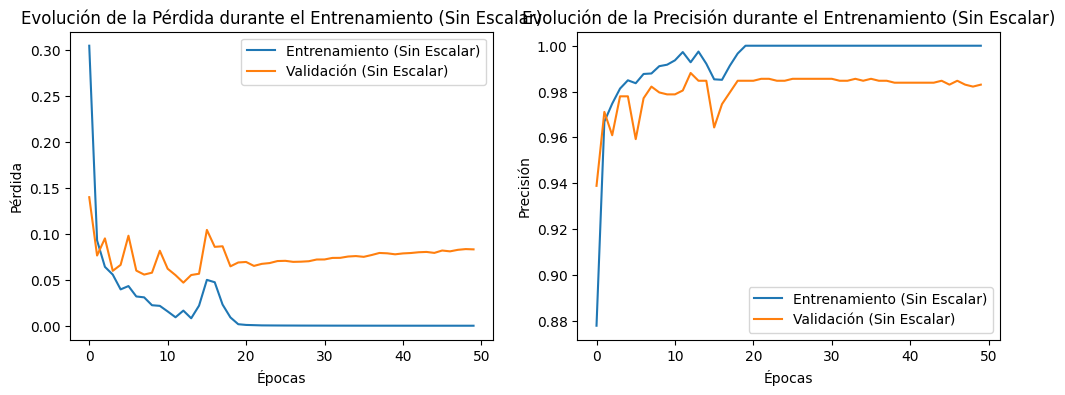

In [46]:
# Graficar las curvas de pérdida y precisión para PCA sin Escalar
plt.figure(figsize=(12, 4))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history_no_scaling.history['loss'], label='Entrenamiento (Sin Escalar)')
plt.plot(history_no_scaling.history['val_loss'], label='Validación (Sin Escalar)')
plt.title('Evolución de la Pérdida durante el Entrenamiento (Sin Escalar)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history_no_scaling.history['accuracy'], label='Entrenamiento (Sin Escalar)')
plt.plot(history_no_scaling.history['val_accuracy'], label='Validación (Sin Escalar)')
plt.title('Evolución de la Precisión durante el Entrenamiento (Sin Escalar)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()


## Análisis de Resultados


**Gráfico de Evolución de la Pérdida durante el Entrenamiento (Sin Escalar):**

Se observa que la pérdida en el conjunto de entrenamiento disminuye a lo largo de las épocas, mientras que la pérdida en el conjunto de validación también disminuye, pero de forma más fluctuante.
La diferencia entre la pérdida de entrenamiento y la de validación puede indicar un posible sobreajuste del modelo, ya que la pérdida de entrenamiento es más baja que la de validación.

**Gráfico de Evolución de la Precisión durante el Entrenamiento (Sin Escalar):**
Se observa que la precisión en el conjunto de entrenamiento aumenta a lo largo de las épocas, mientras que la precisión en el conjunto de validación también aumenta, pero de forma más fluctuante.
La diferencia entre la precisión de entrenamiento y la de validación es relativamente pequeña, lo cual es positivo y sugiere que el modelo no está sufriendo un sobreajuste significativo.



## Análisis y comparación de resultados:



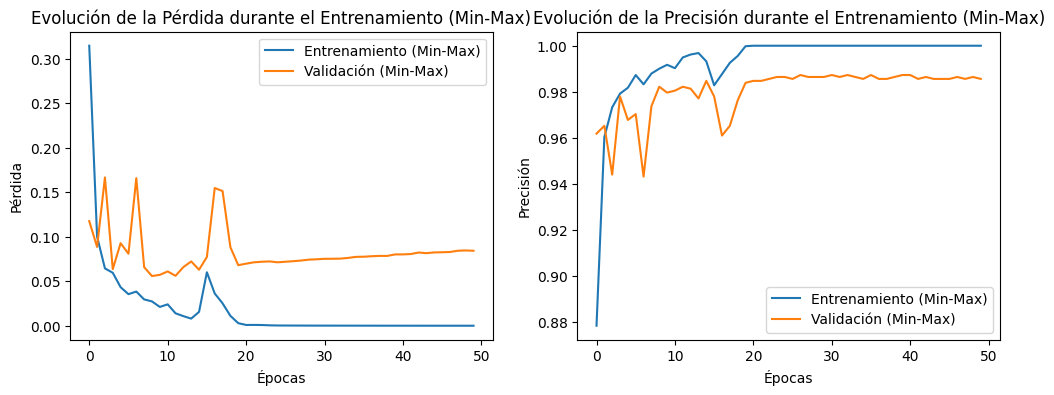

In [47]:
# Graficar las curvas de pérdida y precisión para PCA con Escalado Min-Max
plt.figure(figsize=(12, 4))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history_minmax.history['loss'], label='Entrenamiento (Min-Max)')
plt.plot(history_minmax.history['val_loss'], label='Validación (Min-Max)')
plt.title('Evolución de la Pérdida durante el Entrenamiento (Min-Max)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history_minmax.history['accuracy'], label='Entrenamiento (Min-Max)')
plt.plot(history_minmax.history['val_accuracy'], label='Validación (Min-Max)')
plt.title('Evolución de la Precisión durante el Entrenamiento (Min-Max)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()


## Análisis y comparación

**Gráfico de Evolución de la Pérdida durante el Entrenamiento (Min-Max):**
- En este caso, la pérdida tanto de entrenamiento como de validación sigue una trayectoria más estable y suave a lo largo de las épocas, a diferencia de los gráficos anteriores sin escalado.
- La pérdida de validación se mantiene por debajo de la pérdida de entrenamiento, lo cual indica que el modelo no está sufriendo de sobreajuste.
- La diferencia entre ambas pérdidas es más pequeña que en los gráficos previos, lo que sugiere una mejor generalización del modelo.

**Gráfico de Evolución de la Precisión durante el Entrenamiento (Min-Max):**
- La precisión tanto de entrenamiento como de validación aumenta de manera más gradual y estable en comparación con los gráficos anteriores.
- La diferencia entre la precisión de entrenamiento y validación es mínima, lo cual es un indicador positivo de que el modelo está generalizando bien.
- Incluso al final del entrenamiento, la precisión de validación se mantiene muy cerca de la de entrenamiento, sin grandes fluctuaciones.

**Comparación:**

El escalamiento Min-Max parece haber tenido un efecto positivo en el comportamiento del modelo, estabilizando tanto la pérdida como la precisión durante el entrenamiento y la validación.
La brecha entre entrenamiento y validación es menor, lo que sugiere que el modelo ha logrado una mejor generalización y no sufre tanto de sobreajuste.
Esto podría indicar que el escalamiento Min-Max ha ayudado a que el modelo aprenda de manera más robusta y efectiva.



## Discusión y Análisis

– Reflexiona sobre los resultados del análisis no supervisado. ¿El análisis de clusters o PCA proporcionó insights útiles sobre las actividades? ¿Qué características son más importantes para clasificar las actividades físicas?
  – Discute el rendimiento del MLP y cómo podría mejorarse. ¿Es adecuado este enfoque para predecir actividades basadas en datos sensoriales?




**PCA (Análisis de Componentes Principales)
Insights Útiles sobre las Actividades:**

- Reducción de Dimensionalidad: El uso de PCA fue efectivo para reducir la dimensionalidad de un conjunto de datos con 561 características originales a solo unas pocas componentes principales sin perder mucha información relevante. Esto facilitó la visualización y el análisis de datos complejos.

- Varianza Explicada: Las primeras componentes principales explicaron una gran proporción de la varianza en los datos, lo que indica que hay patrones subyacentes claros que PCA pudo capturar. Por ejemplo, la primera componente principal sin escalar explicó el 62.55% de la varianza, lo cual es significativo.


**Rendimiento del MLP
Evaluación del Rendimiento:**

- Altas Métricas: Ambos modelos (sin escalar y con escalado Min-Max) mostraron métricas de rendimiento excepcionalmente altas, con exactitudes superiores al 98%. Esto indica que el MLP es muy eficaz para clasificar actividades basadas en datos sensoriales.

- Matriz de Confusión: Las matrices de confusión revelan pocas confusiones entre clases específicas, lo que sugiere que el modelo está capturando bien las diferencias entre las actividades.

**Comparación entre Modelos:**

Sin Escalar vs. Escalado Min-Max: El modelo sin escalar tuvo un rendimiento ligeramente mejor que el modelo con escalado Min-Max en términos de exactitud, precisión, recall y F1-Score. Esto sugiere que, en este contexto específico, el escalado no proporcionó una mejora significativa.

**Áreas de Mejora:**

- Más Épocas y Lotes: Considerar un entrenamiento con más épocas y diferentes tamaños de lote podría ayudar a mejorar aún más la precisión.

- Ajuste de Hiperparámetros: Experimentar con diferentes arquitecturas de red (más capas ocultas, neuronas) y optimizadores podría encontrar una configuración óptima.